Learned Q-table:
[[20. 18.]
 [20. 20.]
 [20. 20.]
 [ 0.  0.]]

Optimal Policy (0: Left, 1: Right):
[0 0 0 0]


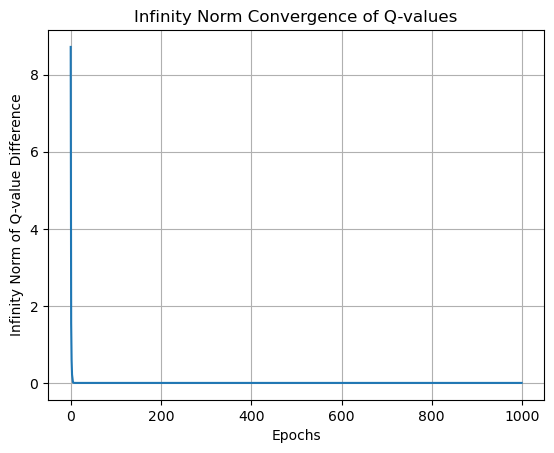

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
n_states = 4  # Number of states in the grid world (including goal state)
n_actions = 2  # Number of possible actions (Left, Right)

# Initialize Q-table with zeros
Q_table = np.zeros((n_states, n_actions))

# Define parameters
learning_rate = 0.8
discount_factor = 0.95
exploration_prob = 0.3
epochs = 1000
iterations_per_epoch = 100  # Fixed number of iterations per epoch
d = 1.0  # Constant reward value for state s=1

# Function to calculate rewards based on state and action
def calculate_reward(state, action):
    if state == 1:
        if action == 0:  # Action L
            return d
        elif action == 1:  # Action R
            return -d
    elif state in [2, 3]:
        return 1  # Deterministic reward of 1 for states 2 and 3
    else:
        return 0  # Default reward (assuming non-terminal states have 0 reward)

# Store Q-tables at each iteration
Q_tables_over_time = []

# Q-learning algorithm
for epoch in range(epochs):
    for _ in range(iterations_per_epoch):
        current_state = np.random.randint(1, n_states)  # Start from a random state (1, 2, or 3)

        # Choose action with epsilon-greedy strategy
        if np.random.rand() < exploration_prob:
            action = np.random.randint(0, n_actions)  # Explore
        else:
            action = np.argmax(Q_table[current_state - 1])  # Exploit (adjust index for zero-based Q-table)

        # Simulate the environment (move to the next state)
        next_state = current_state + 1 if current_state < n_states - 1 else current_state

        # Calculate reward
        reward = calculate_reward(current_state, action)

        # Update Q-value using the Q-learning update rule
        Q_table[current_state - 1, action] += learning_rate * \
            (reward + discount_factor *
             np.max(Q_table[next_state - 1]) - Q_table[current_state - 1, action])

    # Store the Q-table at this epoch
    Q_tables_over_time.append(Q_table.copy())

# After training, the Q-table represents the learned Q-values
print("Learned Q-table:")
print(Q_table)

# Extract optimal policy from Q-table
optimal_policy = np.argmax(Q_table, axis=1)  # Choose action with highest Q-value for each state

print("\nOptimal Policy (0: Left, 1: Right):")
print(optimal_policy)
# Calculate the infinity norm of the difference between the optimal Q and Q(s, a) over time
optimal_Q_without_corruption = Q_table  # Assuming the final Q_table is the optimal Q

infinity_norms = [np.max(np.abs(optimal_Q_without_corruption - Q)) for Q in Q_tables_over_time]

# Plot the infinity norm over epochs
plt.plot(infinity_norms)
plt.xlabel('Epochs')
plt.ylabel('Infinity Norm of Q-value Difference')
plt.title('Infinity Norm Convergence of Q-values')
plt.grid()
plt.show()

Learned Q-table:
[[1002.95107428 1007.42957411]
 [  19.99975517   19.99957419]
 [  19.99975519   19.99957494]
 [   0.            0.        ]]

Optimal Policy (0: Left, 1: Right):
[1 0 0 0]


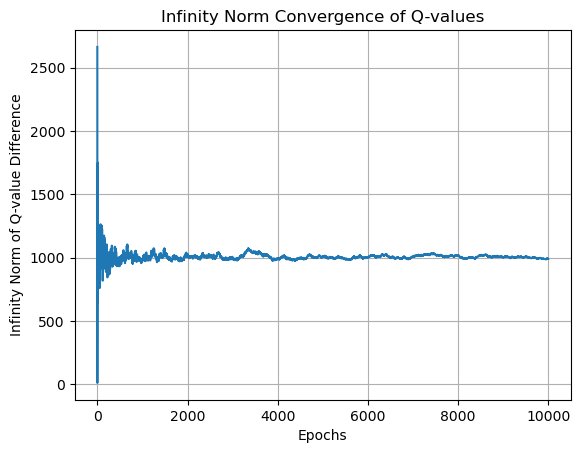

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
n_states = 4  # Number of states in the grid world (including goal state)
n_actions = 2  # Number of possible actions (Left, Right)

# Initialize Q-table with zeros
Q_table = np.zeros((n_states, n_actions))

# Define parameters
learning_rate = 0.8
discount_factor = 0.95
exploration_prob = 0.2
epochs = 10000
iterations_per_epoch = 100  # Fixed number of iterations per epoch
d = 1.0  # Constant reward value for state s=1
epsilon = 0.3  # Probability of attack
kappa = 1000.0  # Positive constant for the attack model

# Function to calculate rewards based on state and action
def calculate_reward(state, action):
    if state == 1:
        if action == 0:  # Action L
            if np.random.rand() < epsilon:
                C = ((2-epsilon)*d+kappa)/epsilon
                return C  # Attack with reward -C
            else:
                return d  # Normal reward d
        elif action == 1:  # Action R
            if np.random.rand() < epsilon:
                C =((2-epsilon)*d+kappa)/epsilon
                return C  # Attack with reward C
            else:
                return -d  # Normal reward -d
    elif state in [2, 3]:
        return 1  # Deterministic reward of 1 for states 2 and 3
    else:
        return 0  # Default reward (assuming non-terminal states have 0 reward)

# Store Q-tables at each iteration
Q_tables_over_time = []

# Q-learning algorithm
for epoch in range(epochs):
    for _ in range(iterations_per_epoch):
        current_state = np.random.randint(1, n_states)  # Start from a random state (1, 2, or 3)

        # Choose action with epsilon-greedy strategy
        if np.random.rand() < exploration_prob:
            action = np.random.randint(0, n_actions)  # Explore
        else:
            action = np.argmax(Q_table[current_state - 1])  # Exploit (adjust index for zero-based Q-table)

        # Simulate the environment (move to the next state)
        next_state = current_state + 1 if current_state < n_states - 1 else current_state

        # Calculate reward
        reward = calculate_reward(current_state, action)

        # Update Q-value using the Q-learning update rule
        Q_table[current_state - 1, action] += (learning_rate/(epoch+1)) * \
            (reward + discount_factor *
             np.max(Q_table[next_state - 1]) - Q_table[current_state - 1, action])

    # Store the Q-table at this epoch
    Q_tables_over_time.append(Q_table.copy())

# After training, the Q-table represents the learned Q-values
print("Learned Q-table:")
print(Q_table)

# Extract optimal policy from Q-table
optimal_policy = np.argmax(Q_table, axis=1)  # Choose action with highest Q-value for each state

print("\nOptimal Policy (0: Left, 1: Right):")
print(optimal_policy)

# Calculate the infinity norm of the difference between the optimal Q and Q(s, a) over time
optimal_Q = Q_table  # Assuming the final Q_table is the optimal Q

infinity_norms = [np.max(np.abs(optimal_Q_without_corruption - Q)) for Q in Q_tables_over_time]

# Plot the infinity norm over epochs
first_plot_1=plt.plot(infinity_norms)
plt.xlabel('Epochs')
plt.ylabel('Infinity Norm of Q-value Difference')
plt.title('Infinity Norm Convergence of Q-values')
plt.grid()
plt.show()

In [3]:
def univariate_trimmed_mean(Z, Z_tilde, epsilon, delta):
    M = len(Z) + len(Z_tilde)
    assert len(Z) == len(Z_tilde) == M // 2, "Z and Z_tilde must both have M/2 elements."

    # Step 1: Set ζ = 8ε + 24 log(4/δ) / M
    zeta = 8 * epsilon + 24 * np.log(4 / delta) / M
    zeta = min(zeta, 1)  # Ensure ζ does not exceed 1

    # Step 2: Compute quantiles γ and β
    Z_sorted = np.sort(Z)
    gamma_index = int(np.floor(zeta * (M // 2)))
    beta_index = int(np.floor((1 - zeta) * (M // 2)))

    gamma_index = min(gamma_index, len(Z_sorted) - 1)  # Ensure the index is within bounds
    beta_index = min(beta_index, len(Z_sorted) - 1)    # Ensure the index is within bounds

    gamma = Z_sorted[gamma_index]
    beta = Z_sorted[beta_index]

    # Step 3: Compute robust mean estimate
    def phi_gamma_beta(x, gamma, beta):
        if x > beta:
            return beta
        elif x < gamma:
            return gamma
        else:
            return x

    trimmed_sum = sum(phi_gamma_beta(x, gamma, beta) for x in Z_tilde)
    hat_mu_T = (2 / M) * trimmed_sum

    return hat_mu_T

Learned Q-table:
[[20.43898941 18.3761034 ]
 [19.99986841 19.99977029]
 [19.99977419 19.99986834]
 [ 0.          0.        ]]

Optimal Policy (0: Left, 1: Right):
[0 0 1 0]


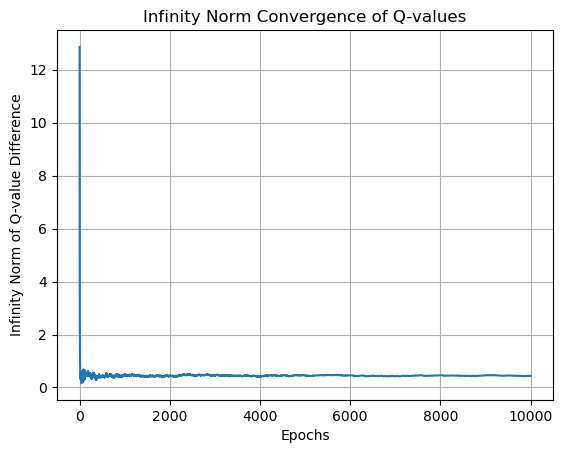

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
n_states = 4  # Number of states in the grid world (including goal state)
n_actions = 2  # Number of possible actions (Left, Right)

# Initialize Q-table with zeros
Q_table = np.zeros((n_states, n_actions))

# Define parameters
learning_rate = 0.8
discount_factor = 0.95
exploration_prob = 0.2
epochs = 10000
iterations_per_epoch = 100  # Fixed number of iterations per epoch
d = 1.0  # Constant reward value for state s=1
epsilon = 0.1  # Probability of attack
kappa = 100.0  # Positive constant for the attack model
delta = 0.1  # Confidence level
total_iterations = epochs * iterations_per_epoch

# Function to calculate rewards based on state and action
def calculate_reward(state, action):
    if state == 1:
        if action == 0:  # Action L
            if np.random.rand() < epsilon:
                C = ((2-epsilon)*d+kappa)/epsilon
                return C  # Attack with reward -C
            else:
                return d  # Normal reward d
        elif action == 1:  # Action R
            if np.random.rand() < epsilon:
                C = ((2-epsilon)*d+kappa)/epsilon
                return C  # Attack with reward C
            else:
                return -d  # Normal reward -d
    elif state in [2, 3]:
        return 1  # Deterministic reward of 1 for states 2 and 3
    else:
        return 0  # Default reward (assuming non-terminal states have 0 reward)

def univariate_trimmed_mean(Z, Z_tilde, epsilon, delta):
    # Equalize lengths of Z and Z_tilde by dropping excess elements
    min_len = min(len(Z), len(Z_tilde))
    Z = Z[:min_len]
    Z_tilde = Z_tilde[:min_len]
    M = len(Z) + len(Z_tilde)

    # Step 1: Set ζ = 8ε + 24 log(4/δ) / M
    zeta = 8 * epsilon + 24 * np.log(4 / delta) / M
    zeta = min(zeta, 1)  # Ensure ζ does not exceed 1

    # Step 2: Compute quantiles γ and β
    Z_sorted = np.sort(Z)
    gamma_index = int(np.floor(zeta * min_len))
    beta_index = int(np.floor((1 - zeta) * min_len))

    gamma_index = min(gamma_index, len(Z_sorted) - 1)  # Ensure the index is within bounds
    beta_index = min(beta_index, len(Z_sorted) - 1)    # Ensure the index is within bounds

    gamma = Z_sorted[gamma_index]
    beta = Z_sorted[beta_index]

    # Step 3: Compute robust mean estimate
    def phi_gamma_beta(x, gamma, beta):
        if x > beta:
            return beta
        elif x < gamma:
            return gamma
        else:
            return x

    trimmed_sum = sum(phi_gamma_beta(x, gamma, beta) for x in Z_tilde)
    hat_mu_T = (2 / M) * trimmed_sum

    return hat_mu_T

# Threshold function G_t
def compute_G_t(t, R, C, epsilon, delta_1):
    T_lim = 2 * np.log(4 / delta_1) + 1
    if t <= T_lim:
        return 2 * R
    else:
        return C * R * (np.sqrt(np.log(4 / delta_1) / t) + np.sqrt(epsilon)) + R

# Epsilon-Robust Q-Learning
Q_tables_over_time = []
delta_1 = delta / (2 * n_states * n_actions * total_iterations)
R = 1  # Example R value, adjust as needed
C = 1  # Example C value, adjust as needed

for epoch in range(epochs):
    past_rewards_dict = {(s, a): [] for s in range(n_states) for a in range(n_actions)}  # Store past rewards for each state-action pair

    for t in range(1, iterations_per_epoch + 1):
        current_state = np.random.randint(1, n_states)  # Start from a random state (1, 2, or 3)

        # Choose action with epsilon-greedy strategy
        if np.random.rand() < exploration_prob:
            action = np.random.randint(0, n_actions)  # Explore
        else:
            action = np.argmax(Q_table[current_state - 1])  # Exploit (adjust index for zero-based Q-table)

        # Simulate the environment (move to the next state)
        next_state = current_state + 1 if current_state < n_states - 1 else current_state

        # Calculate reward
        reward = calculate_reward(current_state, action)

        # Append reward to past rewards for the current state-action pair
        past_rewards_dict[(current_state, action)].append(reward)
        if len(past_rewards_dict[(current_state, action)]) > iterations_per_epoch:
            past_rewards_dict[(current_state, action)].pop(0)  # Keep the past rewards list to size iterations_per_epoch

        past_rewards = past_rewards_dict[(current_state, action)]
        if len(past_rewards) < 2:
            trimmed_reward = reward  # Not enough data for trimming, use the current reward
        else:
            Z = past_rewards[:len(past_rewards)//2]
            Z_tilde = past_rewards[len(past_rewards)//2:]
            trimmed_reward = univariate_trimmed_mean(Z, Z_tilde, epsilon, delta_1)
        
        # Apply thresholding
        G_t = compute_G_t(t, R, C, epsilon, delta_1)
        if abs(trimmed_reward) > G_t:
            trimmed_reward = np.sign(trimmed_reward) * G_t

        # Update Q-value using the Q-learning update rule
        Q_table[current_state - 1, action] += (learning_rate/(epoch+1)) * \
            (trimmed_reward + discount_factor *
             np.max(Q_table[next_state - 1]) - Q_table[current_state - 1, action])

    # Store the Q-table at this epoch
    Q_tables_over_time.append(Q_table.copy())

# After training, the Q-table represents the learned Q-values
print("Learned Q-table:")
print(Q_table)

# Extract optimal policy from Q-table
optimal_policy = np.argmax(Q_table, axis=1)  # Choose action with highest Q-value for each state

print("\nOptimal Policy (0: Left, 1: Right):")
print(optimal_policy)

# Calculate the infinity norm of the difference between the optimal Q and Q(s, a) over time
optimal_Q = Q_table  # Assuming the final Q_table is the optimal Q

infinity_norms = [np.max(np.abs(optimal_Q_without_corruption - Q)) for Q in Q_tables_over_time]

# Plot the infinity norm over epochs
first_plot_2 = plt.plot(infinity_norms)
plt.xlabel('Epochs')
plt.ylabel('Infinity Norm of Q-value Difference')
plt.title('Infinity Norm Convergence of Q-values')
plt.grid()
plt.show()